
**Requirements for SVM:**

Supervised Learning = Needs labeled data (features + target labels).

SVM needs purely numerical data for computing dot products efficiently.

-Train/Test Split = We need separate training and testing sets to:

Requirements for SVM:

Supervised Learning = Needs labeled data (features + target labels).

SVM needs purely numerical data for computing dot products efficiently.

-Train/Test Split = We need separate training and testing sets to:

-Train the model on one portion

-Test it on unseen data to avoid overfitting.

We must ensure training and testing sets are disjoint (no data leakage).

In [1]:
import pandas as pd

data = pd.read_csv('cleaned_merged_data.csv')


print(data.shape)
data.head()

(279724, 65)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,2019-04-19,JetBlue Airways,BOS,DEN,False,False,1829,2254.0,265.0,265.0,...,0.489328,0.680193,0.204581,0.243367,0.00000,0.409695,0.035794,0.423316,0.049438,DEN
1,2019-04-20,JetBlue Airways,JFK,DEN,False,False,1951,2024.0,33.0,33.0,...,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124,DEN
2,2019-04-20,JetBlue Airways,BOS,DEN,False,False,1829,1822.0,0.0,-7.0,...,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124,DEN
3,2019-04-21,JetBlue Airways,JFK,DEN,False,False,1951,2014.0,23.0,23.0,...,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191,DEN
4,2019-04-21,JetBlue Airways,BOS,DEN,False,False,659,912.0,133.0,133.0,...,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191,DEN


In [2]:

selected_columns = [
    'AirTime', 'Distance', 'TaxiOut', 'TaxiIn',
    'T2M_RANGE', 'T2MDEW', 'T2M_MIN', 'T2M_MAX',
    'QV2M', 'RH2M', 'PRECTOTCORR',
    'WS10M_RANGE', 'WD10M', 'WS50M_RANGE', 'WD50M',
    'DepDel15'
]

data_selected = data[selected_columns]


In [3]:
# Drop missing values
data_cleaned = data_selected.dropna()

print(data_cleaned.shape)
data_cleaned.head()

(279724, 16)


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,DepDel15
0,231.0,1754.0,11.0,7.0,0.866847,0.438014,0.489328,0.680193,0.204581,0.243367,0.00000,0.409695,0.035794,0.423316,0.049438,1.0
1,214.0,1626.0,29.0,8.0,0.771480,0.472679,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124,1.0
2,230.0,1754.0,11.0,6.0,0.771480,0.472679,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124,0.0
3,216.0,1626.0,19.0,10.0,0.502924,0.607814,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191,1.0
4,228.0,1754.0,10.0,7.0,0.502924,0.607814,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191,1.0


In [4]:
# Sample only 3000 rows for fast execution
sampled_data = data_cleaned.sample(n=3000, random_state=42)

print(sampled_data.shape)
sampled_data.head()


(3000, 16)


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,DepDel15
182623,114.0,957.0,8.0,8.0,0.702654,0.806698,0.905816,0.931665,0.614534,0.224059,0.015483,0.093625,0.432606,0.103565,0.419382,0.0
8558,57.0,391.0,14.0,5.0,0.771480,0.472679,0.653148,0.764718,0.237757,0.143909,0.000000,0.258964,0.616331,0.442558,0.626124,0.0
26629,39.0,113.0,29.0,11.0,0.324336,0.090776,0.156617,0.164424,0.024487,0.419225,0.013800,0.091633,0.288031,0.048670,0.292416,0.0
190965,39.0,228.0,9.0,7.0,0.693657,0.551704,0.618196,0.700799,0.300948,0.281845,0.000337,0.433599,0.421141,0.402377,0.482022,0.0
133316,218.0,1620.0,21.0,11.0,0.780927,0.290541,0.585912,0.716148,0.113744,0.000000,0.000000,0.162019,0.706935,0.356537,0.696629,1.0


In [5]:
X = sampled_data.drop('DepDel15', axis=1)
y = sampled_data['DepDel15']

print(X.shape)
print(y.shape)

(3000, 15)
(3000,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")
print(f"Training labels: {y_train.shape}, Testing labels: {y_test.shape}")

Training set: (2100, 15), Testing set: (900, 15)
Training labels: (2100,), Testing labels: (900,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Transform both train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)


(2100, 15) (900, 15)


In [8]:
# Show samples
print("Sample from full cleaned dataset:")
display(data_cleaned.sample(5, random_state=42))

print("Sample from Training set:")
display(X_train.sample(5, random_state=42))

print("Sample from Testing set:")
display(X_test.sample(5, random_state=42))


Sample from full cleaned dataset:


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,DepDel15
182623,114.0,957.0,8.0,8.0,0.702654,0.806698,0.905816,0.931665,0.614534,0.224059,0.015483,0.093625,0.432606,0.103565,0.419382,0.0
8558,57.0,391.0,14.0,5.0,0.771480,0.472679,0.653148,0.764718,0.237757,0.143909,0.000000,0.258964,0.616331,0.442558,0.626124,0.0
26629,39.0,113.0,29.0,11.0,0.324336,0.090776,0.156617,0.164424,0.024487,0.419225,0.013800,0.091633,0.288031,0.048670,0.292416,0.0
190965,39.0,228.0,9.0,7.0,0.693657,0.551704,0.618196,0.700799,0.300948,0.281845,0.000337,0.433599,0.421141,0.402377,0.482022,0.0
133316,218.0,1620.0,21.0,11.0,0.780927,0.290541,0.585912,0.716148,0.113744,0.000000,0.000000,0.162019,0.706935,0.356537,0.696629,1.0


Sample from Training set:


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
8051,418.0,3414.0,9.0,6.0,0.365722,0.269389,0.262273,0.267031,0.101896,0.548271,0.102659,0.243692,0.978188,0.188455,0.973596
203378,73.0,495.0,15.0,6.0,0.423302,0.540834,0.558431,0.527334,0.296998,0.391860,0.090542,0.692563,0.873602,0.662705,0.848315
80463,236.0,1754.0,25.0,11.0,0.354926,0.762045,0.677428,0.589151,0.550553,0.718433,0.171323,0.373174,0.103747,0.387663,0.107584
245227,108.0,846.0,14.0,5.0,0.231669,0.382491,0.340715,0.266190,0.165877,0.759689,0.074722,0.103586,0.296700,0.089417,0.296348
245205,142.0,1014.0,17.0,9.0,0.231669,0.382491,0.340715,0.266190,0.165877,0.759689,0.074722,0.103586,0.296700,0.089417,0.296348


Sample from Testing set:


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
105746,122.0,948.0,22.0,7.0,0.616734,0.710635,0.854322,0.850925,0.488152,0.189054,0.000000,0.186587,0.534676,0.358234,0.557584
181311,115.0,819.0,7.0,6.0,0.749888,0.749412,0.805496,0.874685,0.540284,0.280456,0.000673,0.210491,0.795302,0.287493,0.787079
268158,150.0,977.0,16.0,6.0,0.493027,0.380435,0.410886,0.443650,0.166667,0.480900,0.000000,0.191899,0.609060,0.335597,0.626966
159661,131.0,895.0,10.0,7.0,0.423752,0.343126,0.390342,0.395080,0.142970,0.440339,0.003029,0.183267,0.754195,0.203735,0.758989
201077,130.0,1024.0,18.0,4.0,0.580297,0.469741,0.439434,0.506939,0.229068,0.498403,0.004376,0.193891,0.414709,0.280136,0.419382


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# Define SVM model function
def build_svm_model(X_train, y_train, X_test, y_test, kernel_type, C_value=1, degree=3):
    print(f"\n=== Training SVM (Kernel: {kernel_type}, C: {C_value}) ===")

    if kernel_type == "poly":
        model = SVC(kernel=kernel_type, C=C_value, degree=degree, class_weight='balanced')
    else:
        model = SVC(kernel=kernel_type, C=C_value, class_weight='balanced')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{kernel_type} kernel | C={C_value}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(classification_report(y_test, y_pred))

    return model


=== Training SVM (Kernel: linear, C: 0.1) ===
Accuracy: 0.6544


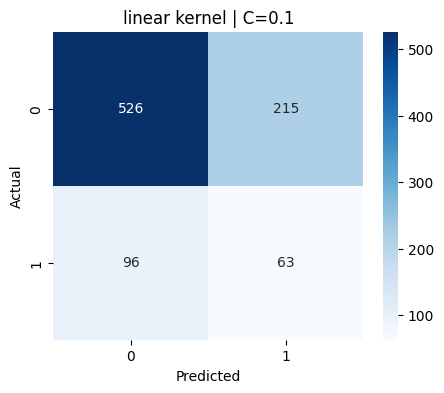

              precision    recall  f1-score   support

         0.0       0.85      0.71      0.77       741
         1.0       0.23      0.40      0.29       159

    accuracy                           0.65       900
   macro avg       0.54      0.55      0.53       900
weighted avg       0.74      0.65      0.69       900


=== Training SVM (Kernel: linear, C: 1) ===
Accuracy: 0.6444


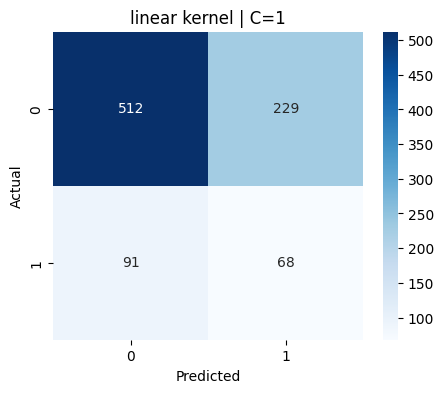

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76       741
         1.0       0.23      0.43      0.30       159

    accuracy                           0.64       900
   macro avg       0.54      0.56      0.53       900
weighted avg       0.74      0.64      0.68       900


=== Training SVM (Kernel: linear, C: 10) ===
Accuracy: 0.6456


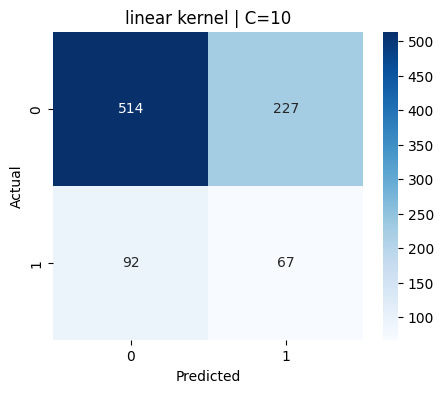

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76       741
         1.0       0.23      0.42      0.30       159

    accuracy                           0.65       900
   macro avg       0.54      0.56      0.53       900
weighted avg       0.74      0.65      0.68       900



In [11]:
# Linear Kernel
for C_val in [0.1, 1, 10]:
    build_svm_model(X_train_scaled, y_train, X_test_scaled, y_test, kernel_type='linear', C_value=C_val)




=== Training SVM (Kernel: poly, C: 0.1) ===
Accuracy: 0.7767


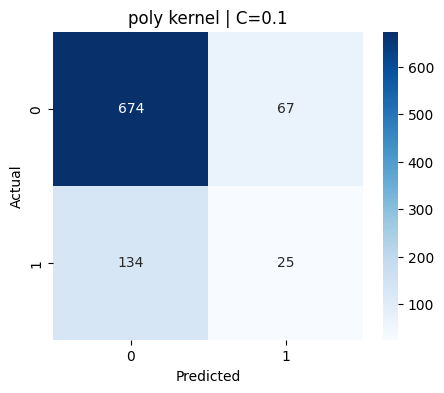

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       741
         1.0       0.27      0.16      0.20       159

    accuracy                           0.78       900
   macro avg       0.55      0.53      0.53       900
weighted avg       0.73      0.78      0.75       900


=== Training SVM (Kernel: poly, C: 1) ===
Accuracy: 0.7144


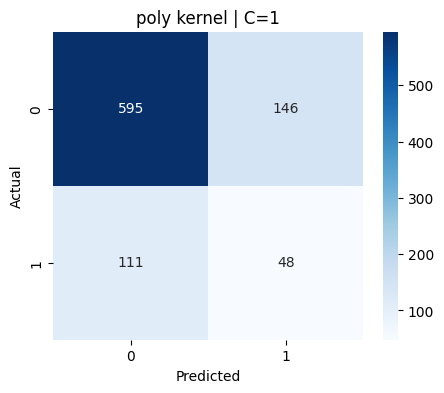

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       741
         1.0       0.25      0.30      0.27       159

    accuracy                           0.71       900
   macro avg       0.55      0.55      0.55       900
weighted avg       0.74      0.71      0.73       900


=== Training SVM (Kernel: poly, C: 10) ===
Accuracy: 0.6633


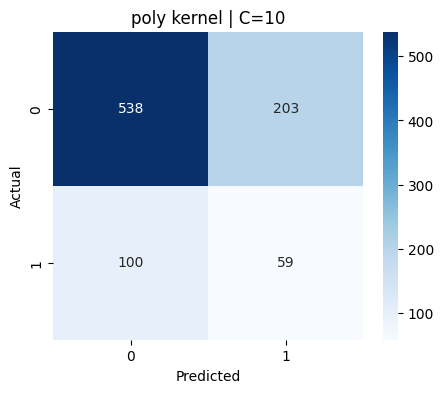

              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       741
         1.0       0.23      0.37      0.28       159

    accuracy                           0.66       900
   macro avg       0.53      0.55      0.53       900
weighted avg       0.73      0.66      0.69       900



In [12]:

# Polynomial Kernel
for C_val in [0.1, 1, 10]:
    build_svm_model(X_train_scaled, y_train, X_test_scaled, y_test, kernel_type='poly', C_value=C_val, degree=3)


=== Training SVM (Kernel: rbf, C: 0.1) ===
Accuracy: 0.6344


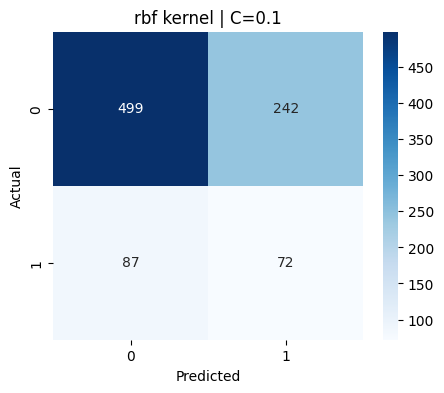

              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75       741
         1.0       0.23      0.45      0.30       159

    accuracy                           0.63       900
   macro avg       0.54      0.56      0.53       900
weighted avg       0.74      0.63      0.67       900


=== Training SVM (Kernel: rbf, C: 1) ===
Accuracy: 0.6467


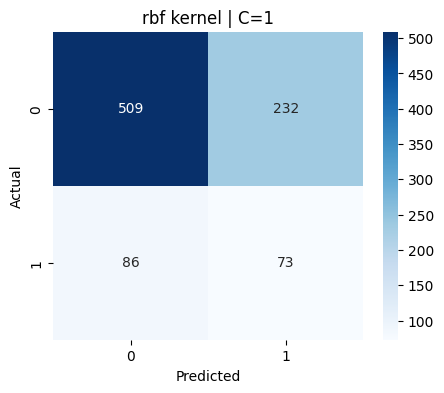

              precision    recall  f1-score   support

         0.0       0.86      0.69      0.76       741
         1.0       0.24      0.46      0.31       159

    accuracy                           0.65       900
   macro avg       0.55      0.57      0.54       900
weighted avg       0.75      0.65      0.68       900


=== Training SVM (Kernel: rbf, C: 10) ===
Accuracy: 0.6778


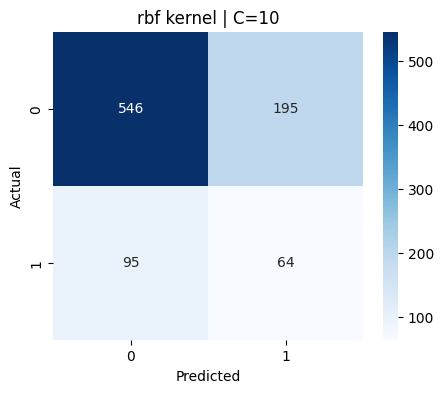

              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79       741
         1.0       0.25      0.40      0.31       159

    accuracy                           0.68       900
   macro avg       0.55      0.57      0.55       900
weighted avg       0.74      0.68      0.70       900



In [13]:
 #RBF Kernel
for C_val in [0.1, 1, 10]:
    build_svm_model(X_train_scaled, y_train, X_test_scaled, y_test, kernel_type='rbf', C_value=C_val)

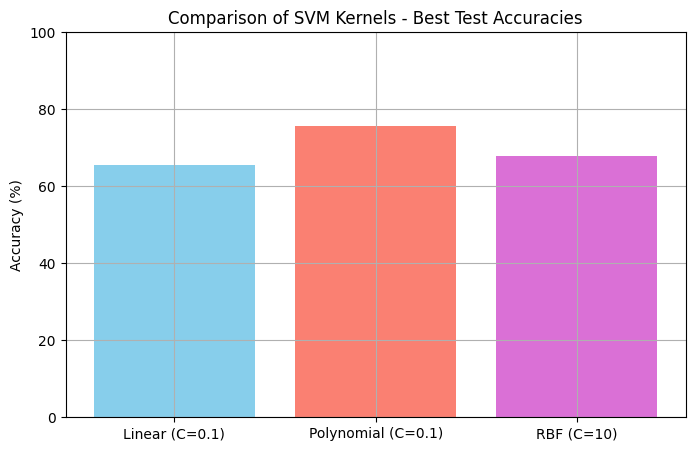

In [14]:
import matplotlib.pyplot as plt

# Accuracies
kernels = ['Linear (C=0.1)', 'Polynomial (C=0.1)', 'RBF (C=10)']
accuracies = [65.4, 75.7, 67.8]

plt.figure(figsize=(8,5))
plt.bar(kernels, accuracies, color=['skyblue', 'salmon', 'orchid'])
plt.title('Comparison of SVM Kernels - Best Test Accuracies')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

